## Minimal example of Ordinary Least Squares regression

![wilber-image](../images/wilber-big.png)

To run the example code click in the first code cell below to select it, then press `Shift Enter` or click the `Run` button on the tool bar above. This will run the code in that cell and jump to the next cell. Repeat the process to work through the example.

Note, the cells must be run in sequence, from first to last, or you will get error mmessages when you try and run code cells that expect values and parameters to have been defined or calculated in cells from above.



### Import the packages we need

In [30]:
'''
---------------------------------------------------------------------
Minimal example of Ordinary Least Squares regression

                                           Roderick Brown, 31/3/2020
 --------------------------------------------------------------------
'''
# This line enables interactive plots to be drawn within this notebook.
# To draw static plots change the word notebook to inline in the line below
%matplotlib notebook

# The line below is not a comment, it sets the type of ascii code to use
# -*- coding: utf-8 -*-

# Import required puthon modules
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#This line will be printed below if succesful
print ('modules loaded successfully.')

modules loaded successfully.


### Create some data

Use `numpy.array` function to create arrays containing x values and y values. We have set the data type to _float_, using `dtype=float`, which means decimal numbers, i.e. from floating point. 

In [11]:
# Create two arrays with the x and y values
x = np.array([1.1,2.3,3.1,3.8,5.1], dtype=float)
y = np.array([3.2,6.5,3.0,9.2,10.9], dtype=float)

# print the arrays to the screen
print ('x values:', x)
print ('y values:', y)

x values: [1.1 2.3 3.1 3.8 5.1]
y values: [ 3.2  6.5  3.   9.2 10.9]


### Plot the data on a graph

We will use the `matplotlib` plotting functions to create plots of our data etc. As you will see below, these functions can be modified and combined with others sequentially to create any kind of plot or graph we wish.

For now this is about the simplest plot we can make :-) 

<IPython.core.display.Javascript object>


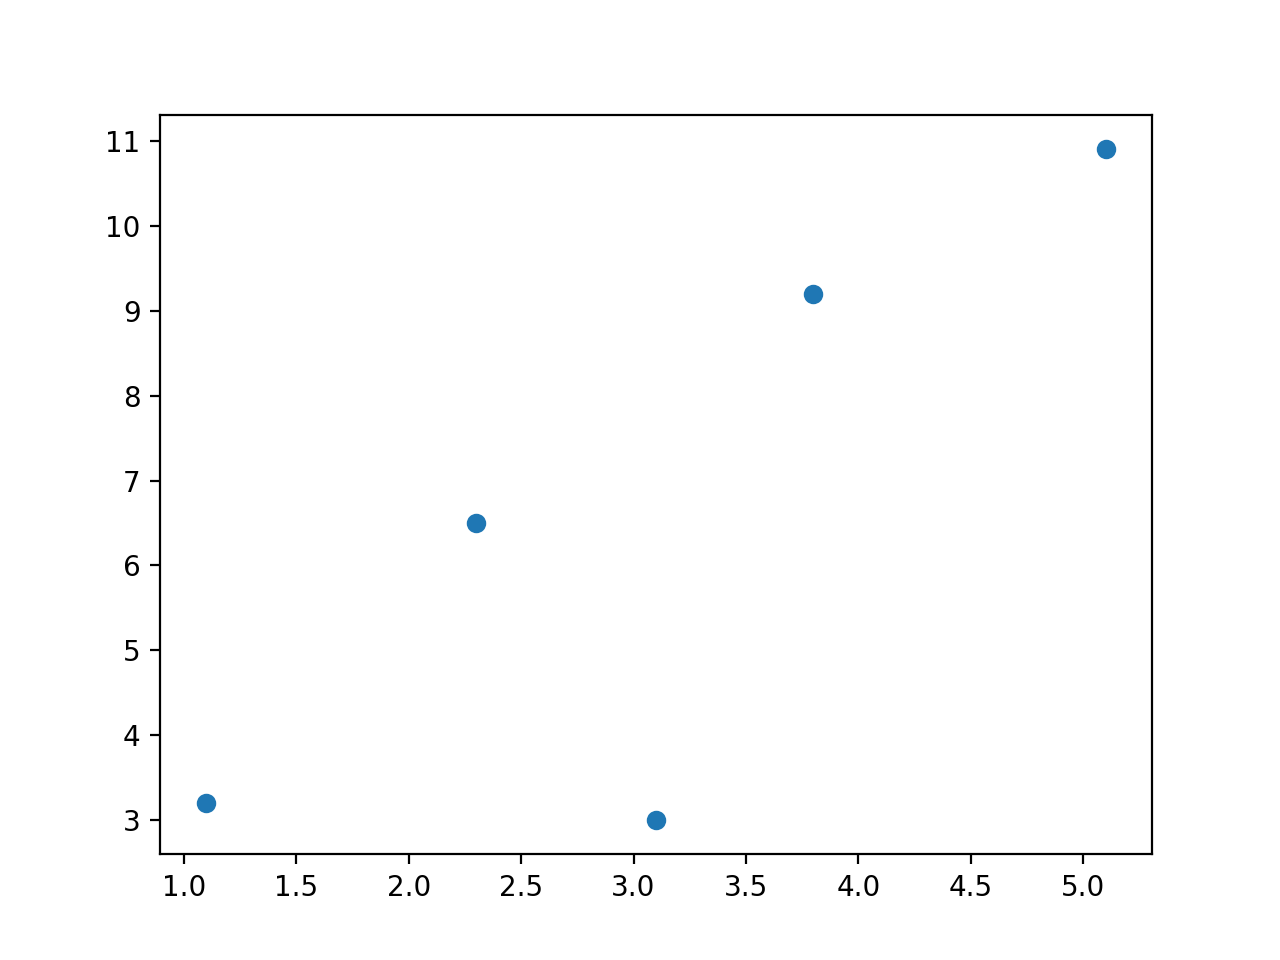

In [33]:
# Plot a graph of y values versus x values

plt.scatter(x,y) # This line draws a scatter plot of our x and y data

### Do the regression stuff...

To run the `scipy.stats.linregress` function we call the function and pass it our `x` and `y` arrays that we defined above as arguments. So the `x` variable contains all the x values and the `y` variable contains all the y values. The funtion will then find the values of `m`, the slope of the line, and `c`, the intercept, that define the straight line $y=mx +c$ that minimises the sum of the squared residuals. These model parameters are then passed back, along with the R value, p value and the standard error on the estimated value for the slope.

The list of variables on the left of the equals sign, i.e. `slope, intercept, r_value, p_value, std_err` will take the values passed back from the function. We could use any name we wish for these variables, but the values passed back by the linregress function are always in the same order. See the [scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) docs for more detail. 


In [36]:
# Call the scipy.stats.linregress routine with x and y arrays as arguments
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# Print some of the returned values of interest
print (f'OLS slope: {slope:04.2f} +/- {std_err:04.2f}')
print (f'OLS intercept: {intercept:04.2f}')
print (f'R value: {r_value**2:04.2f}')
print (f'p value: {p_value:04.2f}')


OLS slope: 1.89 +/- 0.79
OLS intercept: 0.72
R value: 0.66
p value: 0.10


### Plot the data and the fitted straight line

To customise and annoatate our plot we need to call additional plotting functions, and collect these actions by adding them to a figure. The actions are accumulated and added to our plot and the final figure is drawn to the screen when we call the function `plt.show()`.


<IPython.core.display.Javascript object>


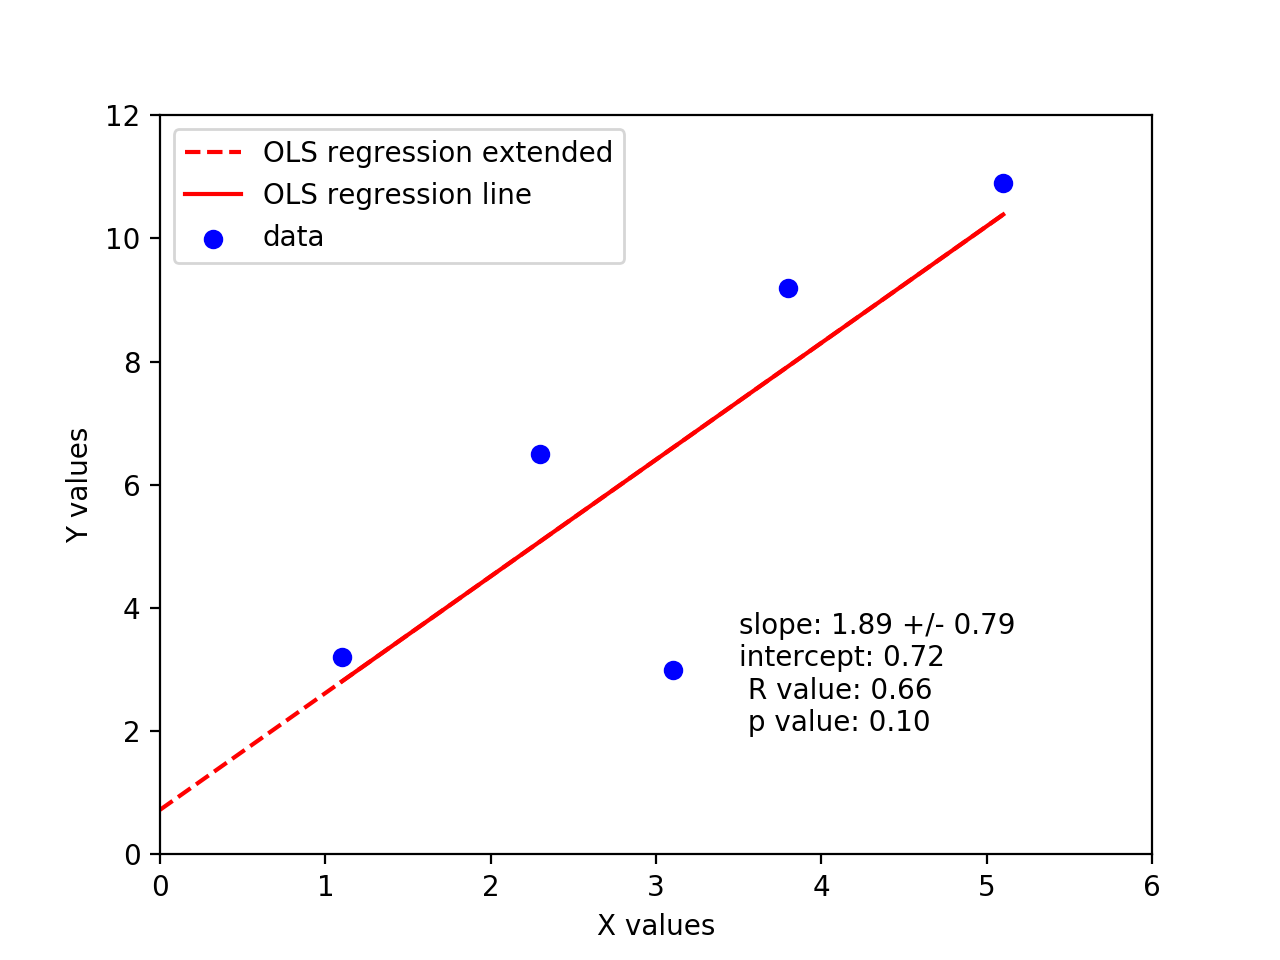

In [37]:
# Create a new plot with the x and y data and show the fitted line
fig = plt.figure(2)

plt.xlim(0,6)   # Set the limits of the x axis
plt.ylim(0,12)  # Set the limits of the y axis

plt.scatter(x,y,label='data',color='b') # Plot the data

# Set limits for plotting fitted line, from x=0 to x max
xline = [0,x[-1]]  # Index -1 means count from the end, i.e. last element in array x
yline = [intercept,(x[-1]*slope+intercept)]

plt.plot(xline, yline,'r--',label='OLS regression extended') # Plot the fitted line

# Just plot fitted line using fitted parameters directly
plt.plot(x,((x*slope) + intercept), 'r-',label='OLS regression line') # Plot the fitted line

plt.ylabel('Y values')
plt.xlabel('X values')

plt.legend(loc='upper left')

# Write the stats for the fitted line on the graph
plt.text(3.5,2,\
f'slope: {slope:04.2f} +/- {std_err:04.2f}\n\
intercept: {intercept:04.2f}\n \
R value: {r_value**2:04.2f}\n \
p value: {p_value:04.2f}')

# Write plot to pdf file. Change file extension to *.png or *.tif as required)
#plt.savefig('ols_example.pdf', format='pdf')

# Show the plot on screen
plt.show()
